## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/PhD_MasterDataset_OT_initial_Jan.csv', firstRow=42, lastRow=48)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_100123_S43-48.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=3)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=70s and ended at t=474s; mass=45.403349999999996g
This equals a volume of 45.494m; expected was 45.536mL; error is 0.092%


## Analyise surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


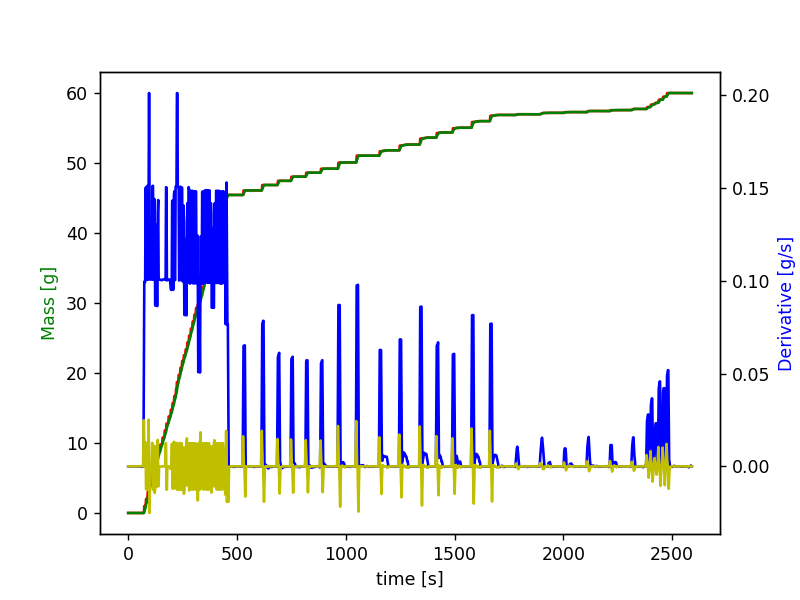

Addition of 0.651g Texapon SB 3 KC detected from 524s to 544s - expected volume = 0.839mL and actual volume = 0.587mL (resulting error is 30.043%)
Addition of 0.78g Texapon SB 3 KC detected from 610s to 650s - expected volume = 0.784mL and actual volume = 0.702mL (resulting error is 10.356%)
Addition of 0.605g Texapon SB 3 KC detected from 682s to 708s - expected volume = 0.557mL and actual volume = 0.548mL (resulting error is 1.675%)
Addition of 0.602g Texapon SB 3 KC detected from 744s to 772s - expected volume = 0.557mL and actual volume = 0.545mL (resulting error is 2.065%)
Addition of 0.574g Texapon SB 3 KC detected from 812s to 840s - expected volume = 0.567mL and actual volume = 0.521mL (resulting error is 8.16%)
Addition of 0.574g Texapon SB 3 KC detected from 880s to 904s - expected volume = 0.567mL and actual volume = 0.521mL (resulting error is 8.112%)
Addition of 0.888g Texapon SB 3 KC detected from 960s to 1000s - expected volume = 0.893mL and actual volume = 0.801mL (resu

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.000625 g/s and for 2nd derivative = 0.000125 g/s^2


<IPython.core.display.Javascript object>


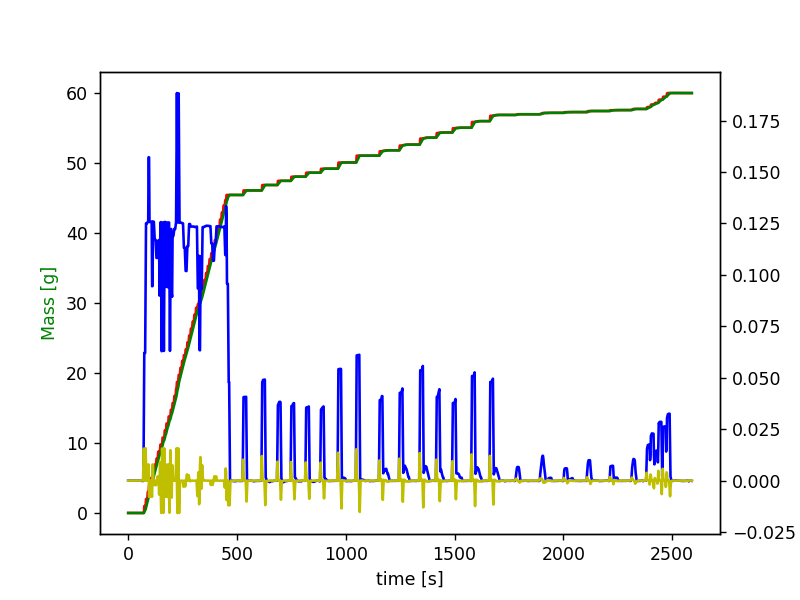

Addition of 0.101g Luviquat Excellence detected from 1706s to 1808s - expected volume = 0.118mL and actual volume = 0.092mL (resulting error is 21.971%)
Addition of 0.21g Luviquat Excellence detected from 1888s to 1952s - expected volume = 0.182mL and actual volume = 0.191mL (resulting error is 4.937%)
Addition of 0.11g Luviquat Excellence detected from 1998s to 2048s - expected volume = 0.091mL and actual volume = 0.1mL (resulting error is 9.875%)
Addition of 0.159g Luviquat Excellence detected from 2104s to 2134s - expected volume = 0.146mL and actual volume = 0.145mL (resulting error is 0.937%)
Addition of 0.136g Luviquat Excellence detected from 2210s to 2256s - expected volume = 0.118mL and actual volume = 0.124mL (resulting error is 4.856%)
Addition of 0.164g Luviquat Excellence detected from 2308s to 2342s - expected volume = 0.155mL and actual volume = 0.149mL (resulting error is 3.493%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=8, bl_mult=7, mergeSens=8, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0011250000000000001 g/s^2


<IPython.core.display.Javascript object>


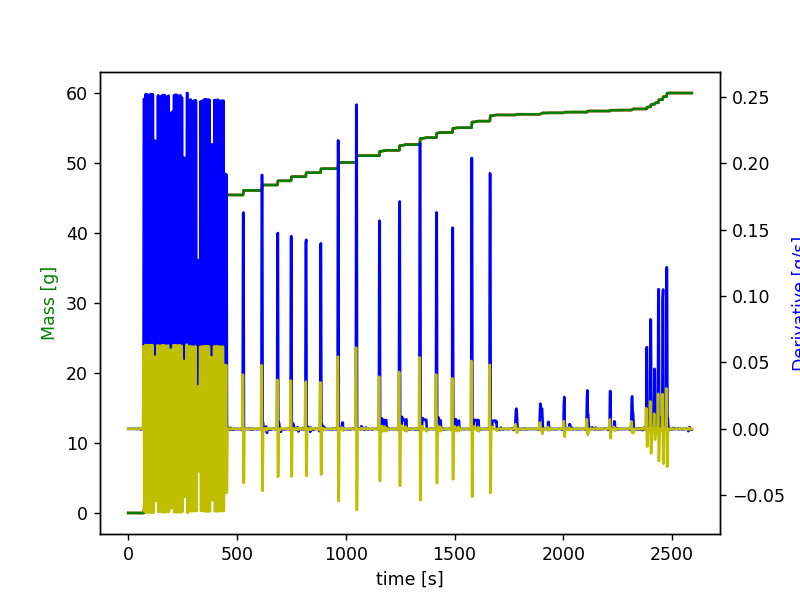

Addition of 0.279g Arlypon TT detected from 2378s to 2394s - expected volume = 0.336mL and actual volume = 0.293mL (resulting error is 12.813%)
Addition of 0.367g Arlypon TT detected from 2396s to 2412s - expected volume = 0.377mL and actual volume = 0.384mL (resulting error is 1.806%)
Addition of 0.233g Arlypon TT detected from 2414s to 2430s - expected volume = 0.2mL and actual volume = 0.245mL (resulting error is 22.632%)
Addition of 0.456g Arlypon TT detected from 2432s to 2448s - expected volume = 0.475mL and actual volume = 0.482mL (resulting error is 1.444%)
Addition of 0.421g Arlypon TT detected from 2452s to 2466s - expected volume = 0.399mL and actual volume = 0.441mL (resulting error is 10.658%)
Addition of 0.52g Arlypon TT detected from 2470s to 2486s - expected volume = 0.514mL and actual volume = 0.546mL (resulting error is 6.122%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S43-S48.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_772\1518789197.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
42,43.0,6.827280,0.0,0.0,0.0,0.0,0.0,0.0,7.998390,0.0,0.0,0.0,0.0,1.064467,0.0,0.0,0.0,0.0,2.927776
43,44.0,7.733538,0.0,0.0,0.0,0.0,0.0,0.0,8.164887,0.0,0.0,0.0,0.0,2.081134,0.0,0.0,0.0,0.0,3.634237
44,45.0,11.849319,0.0,0.0,0.0,0.0,0.0,0.0,9.784769,0.0,0.0,0.0,0.0,1.078661,0.0,0.0,0.0,0.0,2.287400
45,46.0,11.222582,0.0,0.0,0.0,0.0,0.0,0.0,13.867213,0.0,0.0,0.0,0.0,1.549054,0.0,0.0,0.0,0.0,4.461472
46,47.0,8.785170,0.0,0.0,0.0,0.0,0.0,0.0,9.308462,0.0,0.0,0.0,0.0,1.348416,0.0,0.0,0.0,0.0,4.159626
47,48.0,9.649782,0.0,0.0,0.0,0.0,0.0,0.0,8.770554,0.0,0.0,0.0,0.0,1.620769,0.0,0.0,0.0,0.0,5.137067
